### MPDA - Flappy Bird Reinforcement Learning


### PROGRESS:
[Date] [Name]: [What was done]

[30.11.] [mszuc]: [Team work templates, Define tasks for project]

[1.12.] [xsocha02]: [Added random baseline agent + video/GIF]


### BLOCKERS:
None yet

### DECISIONS:
- Using flappy-bird-gymnasium package for environment
- Starting with simple feature space (12 values)
- PyTorch for neural networks

In [1]:
# ═══════════════════════════════════════════════════════════
# SECTION 0: SETUP & INSTALLATION
# ═══════════════════════════════════════════════════════════

!pip install flappy-bird-gymnasium torch torchvision matplotlib imageio

import gymnasium as gym
import flappy_bird_gymnasium
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import random
from gymnasium.wrappers import RecordVideo
import imageio
from moviepy.video.io.VideoFileClip import VideoFileClip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 37.7 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)


In [2]:
# Test environment loads
env = gym.make('FlappyBird-v0', render_mode='rgb_array', use_lidar=True)
print(f"✅ Environment loaded!")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")

✅ Environment loaded!
Observation space: Box(0.0, 1.0, (180,), float64)
Action space: Discrete(2)


  logger.warn(f"{pre} is not within the observation space.")



array([[[ 78, 192, 202],
        [ 78, 192, 202],
        [ 78, 192, 202],
        ...,
        [ 78, 192, 202],
        [ 78, 192, 202],
        [ 78, 192, 202]],

       [[ 78, 192, 202],
        [ 78, 192, 202],
        [ 78, 192, 202],
        ...,
        [ 78, 192, 202],
        [ 78, 192, 202],
        [ 78, 192, 202]],

       [[ 78, 192, 202],
        [ 78, 192, 202],
        [ 78, 192, 202],
        ...,
        [ 78, 192, 202],
        [ 78, 192, 202],
        [ 78, 192, 202]],

       ...,

       [[222, 216, 149],
        [222, 216, 149],
        [222, 216, 149],
        ...,
        [222, 216, 149],
        [222, 216, 149],
        [222, 216, 149]],

       [[222, 216, 149],
        [222, 216, 149],
        [222, 216, 149],
        ...,
        [222, 216, 149],
        [222, 216, 149],
        [222, 216, 149]],

       [[222, 216, 149],
        [222, 216, 149],
        [222, 216, 149],
        ...,
        [222, 216, 149],
        [222, 216, 149],
        [222, 216, 149]]], dtype=uint8)
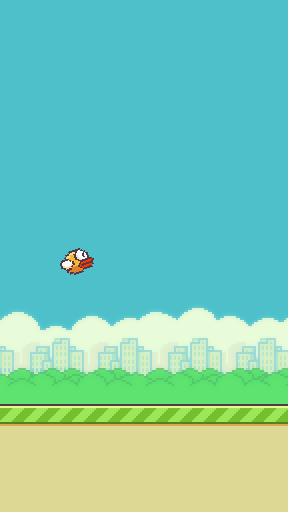

In [3]:
# Render test
env.reset()
env.render()

  logger.warn(f"{pre} is not within the observation space.")



array([[[ 78, 192, 202],
        [ 78, 192, 202],
        [ 78, 192, 202],
        ...,
        [ 78, 192, 202],
        [ 84,  56,  71],
        [ 84,  56,  71]],

       [[ 78, 192, 202],
        [ 78, 192, 202],
        [ 78, 192, 202],
        ...,
        [ 78, 192, 202],
        [ 84,  56,  71],
        [ 84,  56,  71]],

       [[ 78, 192, 202],
        [ 78, 192, 202],
        [ 78, 192, 202],
        ...,
        [ 78, 192, 202],
        [ 84,  56,  71],
        [ 84,  56,  71]],

       ...,

       [[222, 216, 149],
        [222, 216, 149],
        [222, 216, 149],
        ...,
        [222, 216, 149],
        [222, 216, 149],
        [222, 216, 149]],

       [[222, 216, 149],
        [222, 216, 149],
        [222, 216, 149],
        ...,
        [222, 216, 149],
        [222, 216, 149],
        [222, 216, 149]],

       [[222, 216, 149],
        [222, 216, 149],
        [222, 216, 149],
        ...,
        [222, 216, 149],
        [222, 216, 149],
        [222, 216, 149]]], dtype=uint8)
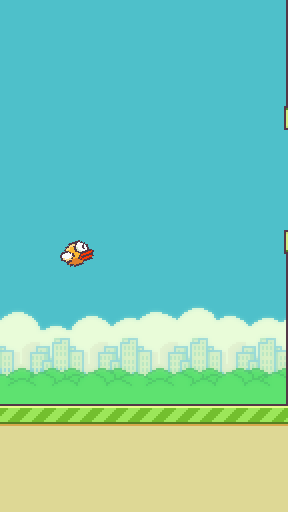

In [4]:
action = 0
env.step(action)

env.render()

array([[[ 78, 192, 202],
        [ 78, 192, 202],
        [ 78, 192, 202],
        ...,
        [132, 169,  68],
        [148, 183,  81],
        [148, 183,  81]],

       [[ 78, 192, 202],
        [ 78, 192, 202],
        [ 78, 192, 202],
        ...,
        [132, 169,  68],
        [148, 183,  81],
        [148, 183,  81]],

       [[ 78, 192, 202],
        [ 78, 192, 202],
        [ 78, 192, 202],
        ...,
        [132, 170,  69],
        [148, 183,  81],
        [148, 183,  81]],

       ...,

       [[222, 216, 149],
        [222, 216, 149],
        [222, 216, 149],
        ...,
        [222, 216, 149],
        [222, 216, 149],
        [222, 216, 149]],

       [[222, 216, 149],
        [222, 216, 149],
        [222, 216, 149],
        ...,
        [222, 216, 149],
        [222, 216, 149],
        [222, 216, 149]],

       [[222, 216, 149],
        [222, 216, 149],
        [222, 216, 149],
        ...,
        [222, 216, 149],
        [222, 216, 149],
        [222, 216, 149]]], dtype=uint8)
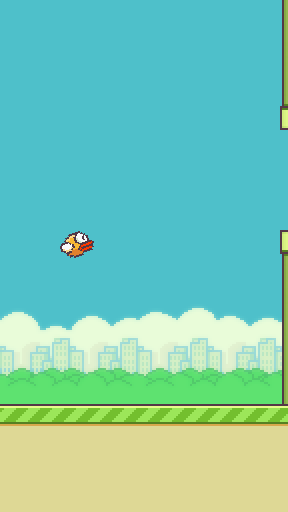

In [5]:
action = 1
env.step(action)

env.render()

In [6]:
env.close()

In [7]:
# ═══════════════════════════════════════════════════════════
# SECTION 1: HYPERPARAMETERS
# ═══════════════════════════════════════════════════════════

LEARNING_RATE = 1e-3
GAMMA = 0.99
EPSILON_START = 1.0
EPSILON_END = 0.01
EPSILON_DECAY = 0.995
BATCH_SIZE = 64
MEMORY_SIZE = 10000
TARGET_UPDATE = 100
NUM_EPISODES = 5000
MODEL_PATH = 'flappy_bird_dqn_v1.pth' # Must match the save path


In [8]:
# ═══════════════════════════════════════════════════════════
# SECTION 2: ENVIRONMENT EXPLORATION
# ═══════════════════════════════════════════════════════════

def explore_environment():
    """
    Understand state/action space of Flappy Bird.
    Prints shapes, runs random episode.
    """
    # TODO: Implement exploration
    observation, info = env.reset()
    print(f"Observation shape: {observation.shape}")
    print(f"Info: {info}")

    print(f"Last 10 values: {observation[-10:]}")

    # jump
    action = 1
    observation, reward, terminated, truncated, info = env.step(action)

    # bird jumped up => lower values increased
    print(f"After action: {observation[-10:]}")

    # don't jump
    action = 0
    observation, reward, terminated, truncated, info = env.step(action)

    # still rising
    print(f"After action: {observation[-10:]}")
    action = 0

env = gym.make('FlappyBird-v0', render_mode='rgb_array', use_lidar=True)
explore_environment()
env.close()

Observation shape: (180,)
Info: {'score': 0}
Last 10 values: [0.87077653 0.86325566 0.85355176 0.84422975 0.83749654 0.83099074
 0.82471771 0.81868282 0.81289137 0.80734859]
After action: [0.92584822 0.91578435 0.90606844 0.8967118  0.88772578 0.88123633
 0.87496653 0.86892114 0.86310487 0.85752239]
After action: [0.97139963 0.96137938 0.95169132 0.9423457  0.93335279 0.92684578
 0.91849489 0.91248114 0.90668591 0.90111343]


In [9]:
# ═══════════════════════════════════════════════════════════
# SECTION 3: RANDOM BASELINE AGENT
# ═══════════════════════════════════════════════════════════

def random_agent_baseline(env, num_episodes=10):
    """
    Random agent for baseline performance.

    Returns:
        avg_score: Average score over episodes
        avg_steps: Average survival time
    """
    scores = []
    steps = []
    for episode in range(num_episodes):
        observation, info = env.reset()
        done = False
        score = 0
        steps_taken = 0
        while not done:
            action = env.action_space.sample()
            observation, reward, terminated, truncated, info = env.step(action)
            score += reward
            done = terminated or truncated
            steps_taken += 1
        scores.append(score)
        steps.append(steps_taken)

    avg_score = np.mean(scores)
    avg_steps = np.mean(steps)

    return avg_score, avg_steps

env = gym.make('FlappyBird-v0', render_mode='rgb_array', use_lidar=True)
env = RecordVideo(env, 'random_agent_video', episode_trigger=lambda x: True)
avg_score, avg_steps = random_agent_baseline(env)
env.close()

print(f"Average score: {avg_score}")
print(f"Average steps: {avg_steps}")
print("Videos saved in /content/random_agent_video/")

# convert to gif
video = VideoFileClip("random_agent_video/rl-video-episode-0.mp4")
video.write_gif("random_agent.gif", fps=30, program='ffmpeg')
print("GIF saved in /content/random_agent.gif")

# When randomly choosing actions, bird almost always flies up to the top of the screen

Average score: -7.619999999999999
Average steps: 50.0
Videos saved in /content/random_agent_video/
MoviePy - Building file  random_agent.gif
MoviePy - - Generating GIF frames.


MoviePy - - File ready: random_agent.gif.
GIF saved in /content/random_agent.gif


In [10]:
# ═══════════════════════════════════════════════════════════
# SECTION 4: DQN NETWORK
# ═══════════════════════════════════════════════════════════

class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        """
        Deep Q-Network.

        Args:
            state_dim: Dimension of state space (12 for features, 180 for LIDAR)
            action_dim: Number of actions (2: nothing/flap)
        """
        super(DQN, self).__init__()

        # 2–3 fully connected layers with ReLU
        hidden1 = 128
        hidden2 = 128

        self.net = nn.Sequential(
            nn.Linear(state_dim, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, action_dim)
        )

    def forward(self, x):
        """
        Forward pass.

        Args:
            x: State tensor [batch_size, state_dim]

        Returns:
            Q-values: [batch_size, action_dim]
        """
        return self.net(x)


# -----------------------------------------------------------
# Model Save / Load
# -----------------------------------------------------------pabad

def save_dqn(model, path):
    """
    Save DQN model weights to file.
    """
    torch.save(model.state_dict(), path)


def load_dqn(path, state_dim, action_dim, device="cpu"):
    """
    Load DQN model weights from file.

    Returns:
        model: DQN instance with loaded weights (in eval mode)
    """
    model = DQN(state_dim, action_dim).to(device)
    state_dict = torch.load(path, map_location=device)
    model.load_state_dict(state_dict)
    model.eval()
    return model


#test
env = gym.make('FlappyBird-v0', use_lidar=True)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

model = DQN(state_dim, action_dim)
test_state = torch.randn(1, state_dim)   # fake input
q_values = model(test_state)

print("State dim:", state_dim)
print("Action dim:", action_dim)
print("Q-values:", q_values)

State dim: 180
Action dim: 2
Q-values: tensor([[-0.0400,  0.0230]], grad_fn=<AddmmBackward0>)


In [11]:
# ═══════════════════════════════════════════════════════════
# SECTION 5: EXPERIENCE REPLAY BUFFER
# ═══════════════════════════════════════════════════════════

from collections import deque
import random
import numpy as np

class ReplayBuffer:
    def __init__(self, capacity):
        """
        Experience replay buffer.

        Args:
            capacity: Maximum number of experiences to store
        """
        self.capacity = capacity
        self.buffer = deque(maxlen=capacity)   # auto-removes old items

    def push(self, state, action, reward, next_state, done):
        """Store one experience into the buffer."""
        experience = (state, action, reward, next_state, done)
        self.buffer.append(experience)

    def sample(self, batch_size):
        """Sample a random batch of experiences."""
        batch = random.sample(self.buffer, batch_size)

        # Unzip the batch
        states, actions, rewards, next_states, dones = zip(*batch)

        # Convert to NumPy arrays (PyTorch will convert later)
        return (
            np.array(states),
            np.array(actions),
            np.array(rewards, dtype=np.float32),
            np.array(next_states),
            np.array(dones, dtype=np.float32),
        )

    def __len__(self):
        """Return current size of the buffer."""
        return len(self.buffer)


#test
buf = ReplayBuffer(100)

buf.push([1,2,3], 1, 0.5, [1,2,4], False)
buf.push([4,5,6], 0, 1.0, [4,5,7], True)

print("Buffer size:", len(buf))
batch = buf.sample(2)

print("Sampled states:", batch[0])
print("Sampled actions:", batch[1])

Buffer size: 2
Sampled states: [[4 5 6]
 [1 2 3]]
Sampled actions: [0 1]


In [12]:
# ═══════════════════════════════════════════════════════════
# SECTION 6: DQN AGENT
class DQNAgent:
    def __init__(self, state_dim, action_dim, device=None):
        """
        DQN Agent with target network.

        Args:
            state_dim: State space dimension
            action_dim: Action space dimension
        """
        self.state_dim = state_dim
        self.action_dim = action_dim

        # Device (CPU / GPU)
        if device is None:
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.device = device

        # Hyperparameters
        self.gamma = 0.99           # discount factor
        self.batch_size = 64
        self.learning_rate = 1e-3
        self.replay_capacity = 50_000
        self.min_buffer_size = 1_000  # start training only after this many transitions

        # Networks
        self.policy_net = DQN(state_dim, action_dim).to(self.device)
        self.target_net = DQN(state_dim, action_dim).to(self.device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()  # target net in eval mode

        # Optimizer & loss
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=self.learning_rate)
        self.loss_fn = nn.MSELoss()

        # Replay buffer
        self.replay_buffer = ReplayBuffer(self.replay_capacity)

    def select_action(self, state, epsilon):
        """
        Epsilon-greedy action selection.

        Args:
            state: Current state (np.array shape [state_dim])
            epsilon: Exploration probability

        Returns:
            action: 0 or 1
        """
        # Explore
        if random.random() < epsilon:
            return random.randrange(self.action_dim)

        # Exploit
        state_tensor = torch.tensor(
            state, dtype=torch.float32, device=self.device
        ).unsqueeze(0)  # [1, state_dim]

        with torch.no_grad():
            q_values = self.policy_net(state_tensor)  # [1, action_dim]
            action = q_values.argmax(dim=1).item()

        return action

    def train_step(self):
        """
        Sample batch and update network.

        Returns:
            loss_value: float or None (if not enough data)
        """
        # Don't train until buffer has enough samples
        if len(self.replay_buffer) < max(self.batch_size, self.min_buffer_size):
            return None

        # Sample batch from replay buffer
        states, actions, rewards, next_states, dones = self.replay_buffer.sample(self.batch_size)

        # Convert to tensors
        states      = torch.tensor(states, dtype=torch.float32, device=self.device)
        actions     = torch.tensor(actions, dtype=torch.long,   device=self.device).unsqueeze(1)   # [B,1]
        rewards     = torch.tensor(rewards, dtype=torch.float32, device=self.device).unsqueeze(1) # [B,1]
        next_states = torch.tensor(next_states, dtype=torch.float32, device=self.device)
        dones       = torch.tensor(dones, dtype=torch.float32,  device=self.device).unsqueeze(1)  # [B,1]

        # Current Q-values from policy network for taken actions
        q_values = self.policy_net(states).gather(1, actions)  # [B,1]

        # Target Q-values using target network
        with torch.no_grad():
            next_q_values = self.target_net(next_states).max(dim=1, keepdim=True)[0]  # [B,1]
            target_q_values = rewards + self.gamma * (1.0 - dones) * next_q_values

        # Compute loss
        loss = self.loss_fn(q_values, target_q_values)

        # Backpropagation
        self.optimizer.zero_grad()
        loss.backward()
        # (Optional) gradient clipping:
        # torch.nn.utils.clip_grad_norm_(self.policy_net.parameters(), 1.0)
        self.optimizer.step()

        return loss.item()

    def update_target_network(self):
        """Copy weights from policy to target network."""
        self.target_net.load_state_dict(self.policy_net.state_dict())

env = gym.make("FlappyBird-v0", use_lidar=True)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

agent = DQNAgent(state_dim, action_dim)

state, _ = env.reset()
action = agent.select_action(state, epsilon=0.5)
print("Sampled action:", action)

env.close()

  logger.warn(f"{pre} is not within the observation space.")



Sampled action: 0


In [13]:
# ═══════════════════════════════════════════════════════════
# SECTION 8: HELPER FUNCTIONS
# ═══════════════════════════════════════════════════════════

def plot_training_results(rewards, losses):
    """Plot reward curves and training losses."""
    # TODO: Implement plotting
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Training Rewards')

    plt.subplot(1, 2, 2)
    plt.plot(losses)
    plt.xlabel('Episode')
    plt.ylabel('Loss')
    plt.title('Training Losses')
    plt.show()

def save_model(agent, filepath):
    """Save model weights (agent's primary Q-Network: policy_net)."""
    torch.save(agent.policy_net.state_dict(), filepath)
    print(f"✅ Model saved to {filepath}")

def load_model(agent, filepath):
    """Load model weights into agent's primary Q-Network: policy_net."""
    state_dict = torch.load(filepath, map_location=agent.device)
    agent.policy_net.load_state_dict(state_dict)
    agent.policy_net.eval() # Set network to evaluation mode after loading
    print(f"✅ Model loaded from {filepath}")
    return agent

def record_video(env, agent, filename):
    """Record agent gameplay video."""
    # Set a seed for consistent visualization
    SEED = 42

    # 1. Wrap the environment for recording.
    video_env = RecordVideo(env, filename, episode_trigger=lambda x: True, name_prefix='eval_run')

    # 2. Run an episode
    state, _ = video_env.reset(seed=SEED)
    done = False
    total_reward = 0
    step = 0

    while not done:
        # *** FIX: Using agent.select_action and epsilon=0.0 ***
        # Action selection uses the trained agent's greedy policy
        action = agent.select_action(state, epsilon=0.0)

        next_state, reward, terminated, truncated, _ = video_env.step(action)
        done = terminated or truncated
        state = next_state
        total_reward += reward
        step += 1

    video_env.close()
    print(f"✅ Video recorded in the '{filename}' directory. Total Reward: {total_reward:.2f}, Steps: {step}")


In [ ]:
# ═══════════════════════════════════════════════════════════
# SECTION 7: TRAINING LOOP
# ═══════════════════════════════════════════════════════════

def train_dqn(agent, env, num_episodes):
    """
    Main training loop.

    Args:
        agent: DQNAgent instance
        env: Gymnasium environment
        num_episodes: Number of episodes to train

    Returns:
        rewards: List of episode rewards
        losses: List of training losses (avg per episode)
    """
    rewards = []
    losses = []

    epsilon = EPSILON_START
    global_step = 0

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0.0
        episode_losses = []

        while not done:
            # --- Epsilon-greedy action selection ---
            action = agent.select_action(state, epsilon)

            # --- Interact with environment ---
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # --- Store experience in replay buffer ---
            agent.replay_buffer.push(state, action, reward, next_state, done)

            state = next_state
            episode_reward += reward

            # --- Train on a random batch from replay buffer ---
            loss = agent.train_step()
            if loss is not None:
                episode_losses.append(loss)

            global_step += 1

            # --- Periodically update target network ---
            if global_step % TARGET_UPDATE == 0:
                agent.update_target_network()

            # --- Decay epsilon (exploration) ---
            epsilon = max(EPSILON_END, epsilon * EPSILON_DECAY)

        # end of episode
        rewards.append(episode_reward)
        if episode_losses:
            avg_loss = np.mean(episode_losses)
        else:
            avg_loss = 0.0
        losses.append(avg_loss)

        print(
            f"Episode {episode + 1}/{num_episodes} | "
            f"Reward: {episode_reward:.2f} | "
            f"Avg loss: {avg_loss:.4f} | "
            f"Epsilon: {epsilon:.3f}"
        )

    return rewards, losses

#test
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

env = gym.make("FlappyBird-v0", use_lidar=True)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

agent = DQNAgent(state_dim, action_dim, device=device)

rewards, losses = train_dqn(agent, env, NUM_EPISODES)

save_model(agent, MODEL_PATH)

# NEW: save metrics (optional, but nice)
np.save("rewards_v1.npy", rewards)
np.save("losses_v1.npy", losses)

# NEW: show learning curves
plot_training_results(rewards, losses)

env.close()

  logger.warn(f"{pre} is not within the observation space.")



Episode 1/5000 | Reward: -7.50 | Avg loss: 0.0000 | Epsilon: 0.778
Episode 2/5000 | Reward: -8.70 | Avg loss: 0.0000 | Epsilon: 0.606
Episode 3/5000 | Reward: -8.70 | Avg loss: 0.0000 | Epsilon: 0.471
Episode 4/5000 | Reward: -8.70 | Avg loss: 0.0000 | Epsilon: 0.367
Episode 5/5000 | Reward: -8.70 | Avg loss: 0.0000 | Epsilon: 0.286
Episode 6/5000 | Reward: -9.30 | Avg loss: 0.0000 | Epsilon: 0.222
Episode 7/5000 | Reward: -9.30 | Avg loss: 0.0000 | Epsilon: 0.173
Episode 8/5000 | Reward: -9.30 | Avg loss: 0.0000 | Epsilon: 0.135
Episode 9/5000 | Reward: -9.30 | Avg loss: 0.0000 | Epsilon: 0.105
Episode 10/5000 | Reward: -9.30 | Avg loss: 0.0000 | Epsilon: 0.082
Episode 11/5000 | Reward: -9.30 | Avg loss: 0.0000 | Epsilon: 0.063
Episode 12/5000 | Reward: -9.30 | Avg loss: 0.0000 | Epsilon: 0.049
Episode 13/5000 | Reward: -9.30 | Avg loss: 0.0000 | Epsilon: 0.038
Episode 14/5000 | Reward: -9.30 | Avg loss: 0.0000 | Epsilon: 0.030
Episode 15/5000 | Reward: -9.30 | Avg loss: 0.0000 | Epsi

In [ ]:
# ═══════════════════════════════════════════════════════════
# SECTION 9.5: VIDEO
# ═══════════════════════════════════════════════════════════

LIDAR_OBS = True
ENV_ID = 'FlappyBird-v0'

MODEL_PATH = 'flappy_bird_dqn_v1.pth' # Must match the save path
VIDEO_FOLDER = './dqn_v1_performance_video'

# 1. Instantiate a new evaluation agent
eval_agent = DQNAgent(state_dim, action_dim, device=device)

# 2. Load the model
eval_agent = load_model(eval_agent, MODEL_PATH)

# 3. Create an evaluation environment (must be 'rgb_array' for video)
eval_env = gym.make(
    ENV_ID,
    render_mode='rgb_array',
    use_lidar=LIDAR_OBS
)

# 4. Record the video
record_video(eval_env, eval_agent, VIDEO_FOLDER)

In [ ]:
# ═══════════════════════════════════════════════════════════
# SECTION 9: EVALUATION
# ═══════════════════════════════════════════════════════════

def evaluate_agent(agent, env, num_episodes=10):
    """
    Evaluate agent performance without exploration (epsilon=0).

    Args:
        agent: trained DQNAgent
        env: evaluation environment (no video wrapper)
        num_episodes: number of episodes to evaluate

    Returns:
        avg_reward: Average episode reward
        avg_steps: Average number of steps survived
        scores: List of individual episode rewards
    """
    scores = []
    steps_list = []

    for ep in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0
        ep_steps = 0

        while not done:
            # Greedy action selection (no exploration)
            action = agent.select_action(state, epsilon=0.0)

            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            state = next_state
            episode_reward += reward
            ep_steps += 1

        scores.append(episode_reward)
        steps_list.append(ep_steps)

    avg_reward = float(np.mean(scores))
    avg_steps = float(np.mean(steps_list))

    return avg_reward, avg_steps, scores


# --- RUN EVALUATION ---
# Make a fresh evaluation environment
eval_env2 = gym.make("FlappyBird-v0", use_lidar=True)

# Evaluate the trained model (eval_agent must be loaded in Section 9.5)
avg_reward, avg_steps, scores = evaluate_agent(eval_agent, eval_env2, num_episodes=20)

eval_env2.close()

print("════════ Evaluation Results ════════")
print("Avg reward:", avg_reward)
print("Avg steps:", avg_steps)
print("Scores per episode:", scores)
print("════════════════════════════════════")

np.save("eval_scores_v1.npy", scores)
with open("eval_summary_v1.txt", "w") as f:
    f.write(f"Avg reward: {avg_reward}\n")
    f.write(f"Avg steps: {avg_steps}\n")

In [ ]:
# ═══════════════════════════════════════════════════════════
# SECTION 10: EXPERIMENTS - VERSION 1 (BASIC DQN)
# ═══════════════════════════════════════════════════════════

def run_experiment_v1(num_episodes=NUM_EPISODES):
    print("════ Running Experiment V1: Basic DQN ════")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # 1) Environment + agent
    env = gym.make("FlappyBird-v0", use_lidar=True)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    agent = DQNAgent(state_dim, action_dim, device=device)

    # 2) Train
    rewards, losses = train_dqn(agent, env, num_episodes)
    env.close()

    # 3) Save model + metrics
    MODEL_PATH_V1 = "flappy_bird_dqn_v1.pth"
    save_model(agent, MODEL_PATH_V1)

    np.save("rewards_v1.npy", rewards)
    np.save("losses_v1.npy", losses)

    # 4) Plot learning curves
    plot_training_results(rewards, losses)

    # 5) Evaluation
    eval_env = gym.make("FlappyBird-v0", use_lidar=True)
    avg_reward, avg_steps, scores = evaluate_agent(agent, eval_env, num_episodes=20)
    eval_env.close()

    np.save("eval_scores_v1.npy", scores)
    with open("eval_summary_v1.txt", "w") as f:
        f.write(f"Avg reward: {avg_reward}\n")
        f.write(f"Avg steps: {avg_steps}\n")

    print("════ V1 Evaluation ════")
    print("Avg reward:", avg_reward)
    print("Avg steps:", avg_steps)
    print("Scores:", scores)

    # 6) Record video
    eval_env_video = gym.make("FlappyBird-v0", render_mode="rgb_array", use_lidar=True)
    VIDEO_FOLDER_V1 = "./dqn_v1_video"
    record_video(eval_env_video, agent, VIDEO_FOLDER_V1)
    eval_env_video.close()

    print("✅ Experiment V1 completed.")
    return agent, rewards, losses

# To actually run:
agent_v1, rewards_v1, losses_v1 = run_experiment_v1()


In [ ]:
# ═══════════════════════════════════════════════════════════
# SECTION 11: EXPERIMENTS - VERSION 2 (IMPROVEMENTS: DOUBLE DQN)
# ═══════════════════════════════════════════════════════════

class DoubleDQNAgent(DQNAgent):
    """
    Extends the basic DQNAgent by implementing the Double DQN update rule.
    Double DQN reduces overestimation bias and improves stability.
    """

    def train_step(self):
        # Don’t train until we have enough samples
        if len(self.replay_buffer) < max(self.batch_size, self.min_buffer_size):
            return None

        # Sample from replay buffer
        states, actions, rewards, next_states, dones = self.replay_buffer.sample(self.batch_size)

        states      = torch.tensor(states, dtype=torch.float32, device=self.device)
        actions     = torch.tensor(actions, dtype=torch.long,   device=self.device).unsqueeze(1)
        rewards     = torch.tensor(rewards, dtype=torch.float32, device=self.device).unsqueeze(1)
        next_states = torch.tensor(next_states, dtype=torch.float32, device=self.device)
        dones       = torch.tensor(dones, dtype=torch.float32,  device=self.device).unsqueeze(1)

        # Q(s,a) for current states
        q_values = self.policy_net(states).gather(1, actions)

        # ---------- DOUBLE DQN TARGET UPDATE ----------
        with torch.no_grad():
            # 1) Use policy net to select best next action
            next_actions = self.policy_net(next_states).argmax(dim=1, keepdim=True)

            # 2) Use target net to evaluate that action
            next_q_target = self.target_net(next_states).gather(1, next_actions)

            target_q_values = rewards + self.gamma * (1.0 - dones) * next_q_target

        # Compute loss
        loss = self.loss_fn(q_values, target_q_values)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss.item()



def run_experiment_v2(num_episodes=NUM_EPISODES):
    """
    Run Experiment Version 2:
    - Switch from standard DQN to Double DQN
    - Train, evaluate, save metrics, and record video
    """
    print("════ Running Experiment V2: Double DQN ════")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Initialize environment
    env = gym.make("FlappyBird-v0", use_lidar=True)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    # Initialize improved agent
    agent = DoubleDQNAgent(state_dim, action_dim, device=device)

    # Train Double DQN agent
    rewards, losses = train_dqn(agent, env, num_episodes)
    env.close()

    # Save model & training metrics
    MODEL_PATH_V2 = "flappy_bird_dqn_v2_double.pth"
    save_model(agent, MODEL_PATH_V2)

    np.save("rewards_v2.npy", rewards)
    np.save("losses_v2.npy", losses)

    # Plot learning curves
    plot_training_results(rewards, losses)

    # Evaluate on fresh environment
    eval_env = gym.make("FlappyBird-v0", use_lidar=True)
    avg_reward, avg_steps, scores = evaluate_agent(agent, eval_env, num_episodes=20)
    eval_env.close()

    # Save evaluation results
    np.save("eval_scores_v2.npy", scores)
    with open("eval_summary_v2.txt", "w") as f:
        f.write(f"Avg reward: {avg_reward}\n")
        f.write(f"Avg steps: {avg_steps}\n")

    print("════ V2 Evaluation Results ════")
    print("Avg reward:", avg_reward)
    print("Avg steps:", avg_steps)
    print("Scores:", scores)

    # Record video of trained agent
    eval_env_video = gym.make("FlappyBird-v0", render_mode="rgb_array", use_lidar=True)
    VIDEO_FOLDER_V2 = "./dqn_v2_double_video"
    record_video(eval_env_video, agent, VIDEO_FOLDER_V2)
    eval_env_video.close()

    print("✅ Experiment V2 completed.")
    return agent, rewards, losses

# To run this experiment:
agent_v2, rewards_v2, losses_v2 = run_experiment_v2()


In [ ]:
# ═══════════════════════════════════════════════════════════
# SECTION 12: EXPERIMENTS - VERSION 3 (MORE IMPROVEMENTS)
# ═══════════════════════════════════════════════════════════

def train_dqn_with_reward_shaping(agent, env, num_episodes,
                                  step_reward=0.1,
                                  epsilon_start=1.0,
                                  epsilon_end=0.01,
                                  epsilon_decay=0.997):
    """
    Training loop with reward shaping and tuned epsilon decay.
    """
    rewards = []
    losses = []

    epsilon = epsilon_start
    global_step = 0

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0.0
        episode_losses = []

        while not done:
            action = agent.select_action(state, epsilon)

            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # ---------- REWARD SHAPING ----------
            shaped_reward = reward + step_reward  # small bonus for staying alive

            agent.replay_buffer.push(state, action, shaped_reward, next_state, done)

            state = next_state
            episode_reward += shaped_reward

            loss = agent.train_step()
            if loss is not None:
                episode_losses.append(loss)

            global_step += 1
            if global_step % TARGET_UPDATE == 0:
                agent.update_target_network()

            epsilon = max(epsilon_end, epsilon * epsilon_decay)

        rewards.append(episode_reward)
        losses.append(np.mean(episode_losses) if episode_losses else 0.0)

        print(
            f"[V3] Episode {episode+1}/{num_episodes} "
            f"Reward: {episode_reward:.2f} "
            f"Avg loss: {losses[-1]:.4f} "
            f"Epsilon: {epsilon:.3f}"
        )

    return rewards, losses


def run_experiment_v3(num_episodes=NUM_EPISODES):
    print("════ Running Experiment V3: Double DQN + Reward Shaping ════")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    env = gym.make("FlappyBird-v0", use_lidar=True)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    # Use DoubleDQNAgent again (stacking improvements)
    agent = DoubleDQNAgent(state_dim, action_dim, device=device)

    rewards, losses = train_dqn_with_reward_shaping(
        agent, env, num_episodes,
        step_reward=0.01,
        epsilon_start=1.0,
        epsilon_end=0.05,
        epsilon_decay=0.997
    )
    env.close()

    MODEL_PATH_V3 = "flappy_bird_dqn_v3_shaped.pth"
    save_model(agent, MODEL_PATH_V3)

    np.save("rewards_v3.npy", rewards)
    np.save("losses_v3.npy", losses)

    plot_training_results(rewards, losses)

    eval_env = gym.make("FlappyBird-v0", use_lidar=True)
    avg_reward, avg_steps, scores = evaluate_agent(agent, eval_env, num_episodes=20)
    eval_env.close()

    np.save("eval_scores_v3.npy", scores)
    with open("eval_summary_v3.txt", "w") as f:
        f.write(f"Avg reward: {avg_reward}\n")
        f.write(f"Avg steps: {avg_steps}\n")

    print("════ V3 Evaluation ════")
    print("Avg reward:", avg_reward)
    print("Avg steps:", avg_steps)

    eval_env_video = gym.make("FlappyBird-v0", render_mode="rgb_array", use_lidar=True)
    VIDEO_FOLDER_V3 = "./dqn_v3_shaped_video"
    record_video(eval_env_video, agent, VIDEO_FOLDER_V3)
    eval_env_video.close()

    print("✅ Experiment V3 completed.")
    return agent, rewards, losses

# Run:
agent_v3, rewards_v3, losses_v3 = run_experiment_v3()

In [ ]:
# ═══════════════════════════════════════════════════════════
# SECTION 13: RESULTS & ANALYSIS
# ═══════════════════════════════════════════════════════════

def compare_learning_curves():
    """Plot rewards of V1, V2, V3 on one graph."""
    rewards_v1 = np.load("rewards_v1.npy")
    rewards_v2 = np.load("rewards_v2.npy")
    rewards_v3 = np.load("rewards_v3.npy")

    plt.figure(figsize=(10, 6))
    plt.plot(rewards_v1, label="V1: Basic DQN")
    plt.plot(rewards_v2, label="V2: Double DQN")
    plt.plot(rewards_v3, label="V3: Double DQN + Reward shaping")
    plt.xlabel("Episode")
    plt.ylabel("Episode reward")
    plt.title("Training reward comparison")
    plt.legend()
    plt.grid(True)
    plt.show()


def print_eval_summaries():
    """Print textual comparison of evaluation results."""
    def load_summary(path):
        with open(path, "r") as f:
            lines = f.readlines()
        avg_reward = float(lines[0].split(":")[1])
        avg_steps = float(lines[1].split(":")[1])
        return avg_reward, avg_steps

    avg_r1, avg_s1 = load_summary("eval_summary_v1.txt")
    avg_r2, avg_s2 = load_summary("eval_summary_v2.txt")
    avg_r3, avg_s3 = load_summary("eval_summary_v3.txt")

    print("════ FINAL COMPARISON ════")
    print(f"V1 Basic DQN:       reward={avg_r1:.2f}, steps={avg_s1:.1f}")
    print(f"V2 Double DQN:      reward={avg_r2:.2f}, steps={avg_s2:.1f}")
    print(f"V3 Double+Shaping:  reward={avg_r3:.2f}, steps={avg_s3:.1f}")

# Side-by-side videos are already produced as different folders:
#random_agent_video/, dqn_v1_video/, dqn_v2_double_video/, dqn_v3_shaped_video/

# After running all experiments:
compare_learning_curves()
print_eval_summaries()